    I have all the stock prize data downloaded from kaggle and then I filtered out the required 3 months stock price data for Apple, Microsoft, Netflix and Google. So i can use the other dataset i
    

# 📈 Stock Market Analysis (Data Analyst Project)

## 1. Project Overview
## 2. Business Objective
## 3. Dataset Description
## 4. Importing Required Libraries
## 5. Data Loading


### 1.Project Overview
This project analyzes historical stock price data to understand price trends, volatility, and relationships between major stocks.The analysis focuses on comparative performance and statistical patterns in the stock market.


### 2. Business Objective
The objective of this project is to analyze and compare stock price movements of major companies, identify trends, compute moving averages and volatility, and study correlations between stock prices.

### 3.Dataset Description
The dataset contains historical daily stock price data for multiple companies and ETFs. Each stock file includes Date, Open, High, Low, Close, Adjusted Close, and Volume.

Additionally, a metadata file provides information about valid symbols.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")

In [3]:
meta_df = pd.read_csv("data/symbols_valid_meta.csv")
meta_df.head()


,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
0,Y,A,"Agilent Technologies, Inc. Common Stock",N,,N,100.0,N,NaN,A,A,N
1,Y,AA,Alcoa Corporation Common Stock,N,,N,100.0,N,NaN,AA,AA,N
2,Y,AAAU,Perth Mint Physical Gold ETF,P,,Y,100.0,N,NaN,AAAU,AAAU,N
3,Y,AACG,ATA Creativity Global - American Depositary Sh...,Q,G,N,100.0,N,N,NaN,AACG,N
4,Y,AADR,AdvisorShares Dorsey Wright ADR ETF,P,,Y,100.0,N,NaN,AADR,AADR,N


In [5]:
# we are starting with only one stock (apple)
aapl_df = pd.read_csv("data/stocks/AAPL.csv")
aapl_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400


In [7]:
aapl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9909 entries, 0 to 9908
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9909 non-null   object 
 1   Open       9909 non-null   float64
 2   High       9909 non-null   float64
 3   Low        9909 non-null   float64
 4   Close      9909 non-null   float64
 5   Adj Close  9909 non-null   float64
 6   Volume     9909 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 542.0+ KB


In [8]:
aapl_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9909.000000,9909.000000,9909.000000,9909.000000,9909.000000,9.909000e+03
mean,32.606849,32.936079,32.277560,32.618030,30.576570,8.582916e+07
std,58.415759,59.001576,57.883037,58.471899,56.746275,8.597195e+07
min,0.198661,0.198661,0.196429,0.196429,0.155638,3.472000e+05
25%,1.071429,1.089286,1.048571,1.071429,0.917643,3.304230e+07
50%,1.729286,1.758929,1.696429,1.732143,1.466154,5.766490e+07
75%,35.799999,36.265713,35.328571,35.761429,31.042374,1.069992e+08
max,324.739990,327.850006,323.350006,327.200012,327.200012,1.855410e+09


In [12]:
# converting it to pandas datetime
aapl_df['Date'] = pd.to_datetime(aapl_df['Date'])
aapl_df = aapl_df.sort_values('Date')

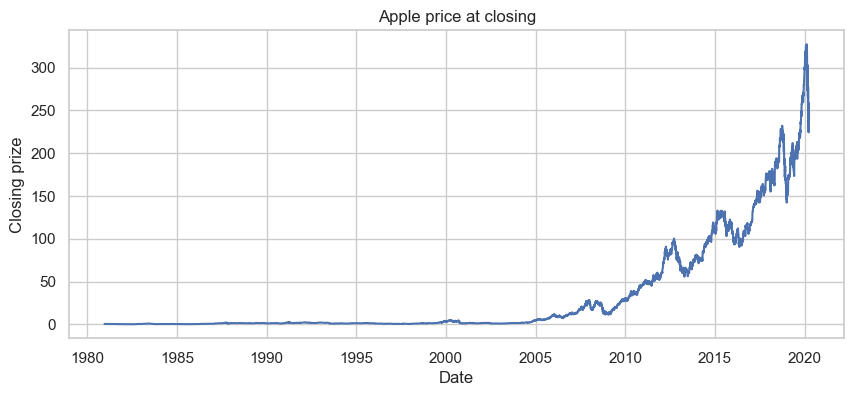

In [15]:
#validation step
plt.figure(figsize=(10,4))
plt.plot(aapl_df["Date"],aapl_df["Close"])
plt.title("Apple price at closing")
plt.xlabel("Date")
plt.ylabel("Closing prize")
plt.show()